# Crab pulsar + nebula

In this example we simulate the Crab complex (nebula + pulsar) starting from a real Chandra observation of the region and we run two different analyses for the nebula and the pulsar

In [1]:
import numpy
from astropy.io import fits
from astropy.wcs import WCS

from ixpeobssim.binning.misc import xBinnedMap, xBinnedPulseProfile
from ixpeobssim.binning.polarization import xBinnedPolarizationMapCube, xBinnedPolarizationCube
from ixpeobssim.core import pipeline
from ixpeobssim.utils.matplotlib_ import plt
from ixpeobssim.utils.units_ import arcmin_to_arcsec, arcsec_to_arcmin

from crab import ra_psr, dec_psr, ephemeris, pol_deg_spline, pol_ang_spline

>>> Loading XSPEC local models from the "ixpeobssim" package in /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec...
>>> Could not XSPEC load local models.

***Error: Xspec was unable to load the model package: ixpeobssim
   Either it could not find the model library file in the directory:
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec
   or the file contains errors.
   (try "load (path)/(lib filename)" for more error info)
>>> (This might indicate that you need to compile them.)
>>> See the documentation for more info about XSPEC support.
>>> Done.
>>> Reading data from crab_pulsar2.txt...
>>> Reading input Chandra photon list acisf16364_repro_evt2.fits...


Filename: acisf16364_repro_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   ()      
  1  EVENTS        1 BinTableHDU    965   3426380R x 20C   [1D, 1J, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   491R x 2C   [1D, 1D]   


image-header keyword MJD-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREF in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
image-header keyword TIMEPIXR in binary table. [astropy.wcs.wcs]
image-header keyword RADESYSa in binary table. [astropy.wcs.wcs]
image-header keyword TIMEDEL in binary table. [astropy.wcs.wcs]
>>> Total Chandra observation time: 1430.704257 s.
>>> FLUX column NOT found in the Chandra event list.
>>> Using standard Chandra IRFs to compute the average exposure...
>>> Loading Chandra effective area from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/irf/fits/chandra_aci

Configuration options for simulation and analysis

In [2]:
DURATION = 40000.
ENERGY_BINNING = [2., 8.]
MODEL_NAME = 'crab'
CONFIG_FILE = '%s.py' % MODEL_NAME
IMG_FILE_PATH = 'acisf16364N002_cntr_img2.fits'

### Simulation

Load the model and run xpobssim to simulate the IXPE observation

In [3]:
pipeline.set_model(MODEL_NAME)
sim_list = pipeline.xpobssim(duration=DURATION, configfile=CONFIG_FILE)

>>> Setting output file base name to /Users/karur/ixpeobssimdata/crab...
>>> Setting up the source model...
>>> Reading data from crab_pulsar2.txt...
>>> Reading input Chandra photon list acisf16364_repro_evt2.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: acisf16364_repro_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   ()      
  1  EVENTS        1 BinTableHDU    965   3426380R x 20C   [1D, 1J, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   491R x 2C   [1D, 1D]   


>>> Total Chandra observation time: 1430.704257 s.
>>> FLUX column NOT found in the Chandra event list.
>>> Using standard Chandra IRFs to compute the average exposure...
>>> Loading Chandra effective area from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/irf/fits/chandra_acis_s.arf...
>>> Loading Chandra vignetting from /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/irf/fits/chandra_vignet.fits...
>>> Chandra FITS file: acisf16364_repro_evt2.fits
    ROI centered at (83.6230, 22.0191):
- xChandraObservation "Remove" (id = 0)
- xChandraObservation "Crab_PWN" (id = 1)
- xPeriodicPointSource "Crab_pulsar" (id = 2)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 4.034e-10 erg/cm2/s (20.17 mcrab)
    Position: RA = 83.63307624999999 deg, Dec = 22.014493277777778 deg
    Ephemeris: xEphemeris {'met0': 140486330.816, 'nu0': 29.5948563919, 'nudot0': -3.6770137e-10, 'nuddot': 1.18e-20}
>>> Done [t0 + 0.998 s].


### Count map

Run xpbin with the CMAP algoritm to produce the count map and open it with xpbinview application

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2649179R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du1_cmap.fits...
>>> Setting

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du1_cmap.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2567201R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du2_cmap.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2602169R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du3_cmap.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_cmap.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


Set MJD-OBS to 59690.000000 from DATE-OBS.
Set MJD-END to 59690.462963 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


>>> xBinnedMap content:
{}
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


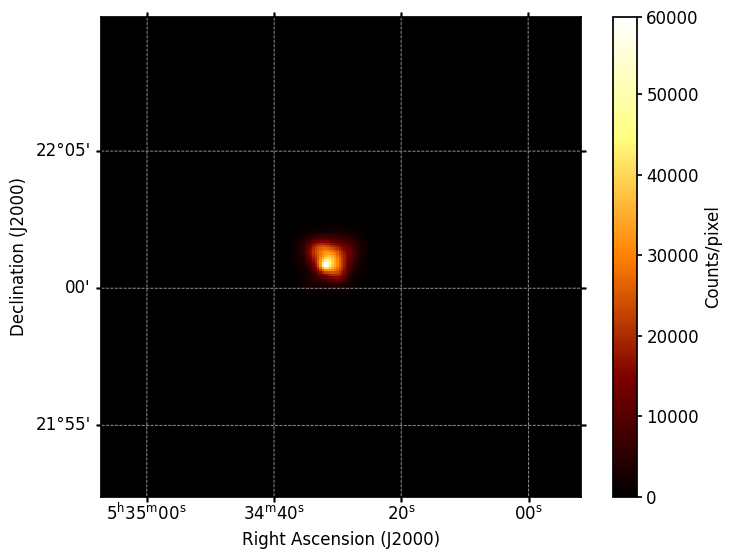

In [4]:
cmap_list = pipeline.xpbin(*sim_list, algorithm='CMAP')
pipeline.xpbinview(*cmap_list)

Instead of using xpbinview, we can open the binned files instancing the corresponding class and configure the plot as needed

>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


Set MJD-OBS to 59690.000000 from DATE-OBS.
Set MJD-END to 59690.462963 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (200, 200)   float64   


/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


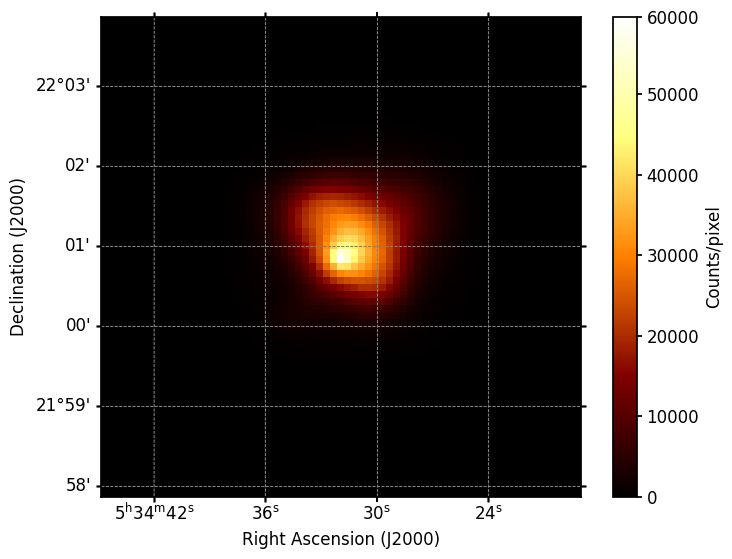

In [5]:
map_ = xBinnedMap.from_file_list(cmap_list)
map_.plot()
map_.fits_image.recenter(ra_psr, dec_psr, arcmin_to_arcsec(3))

### Phase folding and pulse profile

Fold the event files with the ephemeris and calculate the phase using the application xpphase. Then bin the data using xpbin with PP algorithm to get the pulse profile

>>> Opening "/Users/karur/ixpeobssimdata/crab_du1.fits"...
>>> Calculating pulsar phase...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Creating phase column...
>>> Writing to /Users/karur/ixpeobssimdata/crab_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2649179R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Opening "/Users/karur/ixpeobssimdata/crab_du2.fits"...
>>> Calculating pulsar phase...
>>> Creating phase column...
>>> Writing to /Users/karur/ixpeobssimdata/crab_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2567201R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Opening "/Users/karur/ixpeobssimdata/crab_du3.fits"...
>>> Calculating pulsar phase...
>>> Creating phase column...
>>> Writing to /Users/karur/ixpeobssimdata/crab_du3_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2602169R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done!
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_folded.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2649179R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU 

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du1_folded_pp.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_folded.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2567201R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du2_folded_pp.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du2_folded_pp.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_folded.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2602169R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du3_folded_pp.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du3_folded_pp.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_folded.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_folded_pp.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     40   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     39   1R x 2C   ['D', 'D']   


>>> xBinnedPulseProfile content:
{'PHASE': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99]), 'PHASEDEL': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02]), 'COUNTS': array([146726, 149576, 149977, 155668, 166113, 188483, 232753, 224891,
       170970, 156461, 151805, 148707, 148098, 148184, 147131, 148138,
       149047, 149643, 150233, 151189, 152195, 154703, 157884, 162611,
       169417, 179483, 190902, 191633, 170264, 1

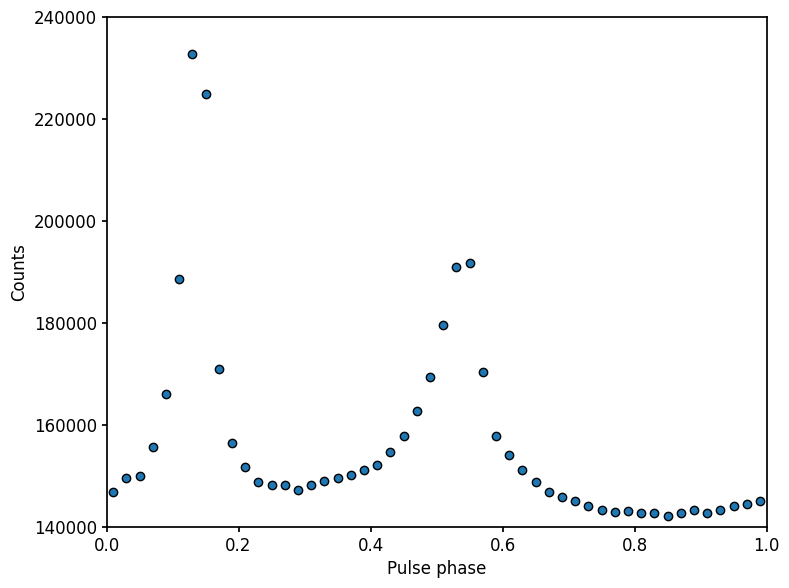

In [6]:
folded_list = pipeline.xpphase(*sim_list, suffix='folded', **ephemeris.dict(), overwrite=True) #phi0=0.15
pp_list = pipeline.xpbin(*folded_list, algorithm='PP', overwrite=True)
pipeline.xpbinview(*pp_list)

### Polarization map cubes

Run xpbin with the PMAPCUBE algorithm to produce polarization map cubes, which contain the relevant polarimetric information binned in energy and sky coordinates

In [7]:
kwargs = dict(npix=50, ebinalg='LIST', ebinning=ENERGY_BINNING, overwrite=True)
pmap_list = pipeline.xpbin(*sim_list, algorithm='PMAPCUBE', **kwargs)
#pipeline.xpbinview(*pmap_list)

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2649179R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du1_pmapcube.fits...
>>> Setting xref to 83.623049418255...
>>> Setting yref to 22.019103733896...
>>> Energy binning: [2. 8.]
>>> Reading (in memory) /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Reading (in memory) /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...
>>> Building wcs object...
>>> 50 pixel(s) @ 0.00583 deg (0.292 deg image size)
>>> Creating EB

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

>>> Writing PMAPCUBE binned data to /Users/karur/ixpeobssimdata/crab_du1_pmapcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2567201R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

>>> Writing PMAPCUBE binned data to /Users/karur/ixpeobssimdata/crab_du2_pmapcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2602169R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

>>> Writing PMAPCUBE binned data to /Users/karur/ixpeobssimdata/crab_du3_pmapcube.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3.fits...


Open the polarization map cubes and plot the polarization degree map with overlaid the polarization angle vectors and the contours of the Chandra map

>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_pmapcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_pmapcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_pmapcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  E_MEAN        1 ImageHDU        24   (50, 50, 1)   float64   
  2  COUNTS        1 ImageHDU        24   (50, 50, 1)   float64   
  3  MU            1 ImageHDU        24   (50, 50, 1)   float64   
  4  W2            1 ImageHDU        24   (50, 50, 1)   float64   
  5  N_EFF         1 ImageHDU        24   (50, 50, 1)   float64   
  6  FRAC_W        1 ImageHDU        24   (50, 50, 1)   float64   
  7  MDP_99        1 ImageHDU        24   (50, 50, 1)   float64   
  8  I             1 ImageHDU        24   (50, 50, 1)   float64   
  9  I_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 10  Q             1 ImageHDU        24   (50, 50, 1)   float64   
 11  Q_ERR         1 ImageHDU        24   (50, 50, 1)   float64   
 12  U             1 ImageHDU        24   (50, 50, 1)   float64   
 13  U_ERR         1 ImageHDU     

/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin
Set MJD-END to 57498.967234 from DATE-END'. [astropy.wcs.wcs]


(13.0, 35.0)

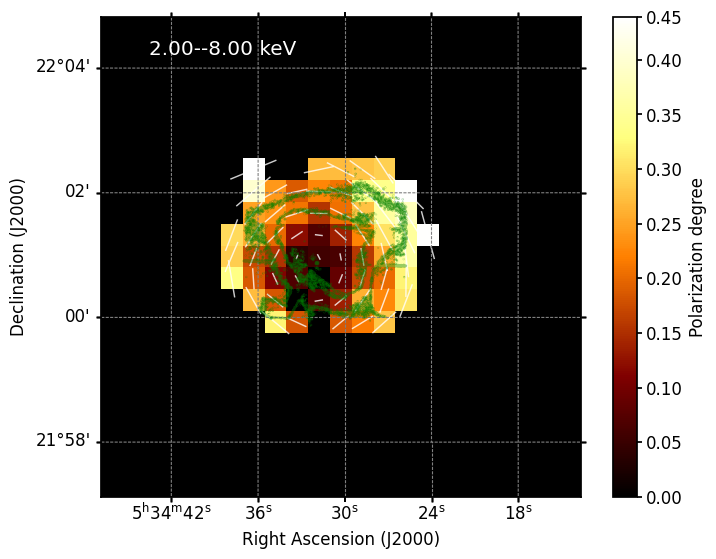

In [8]:
pmap_cube = xBinnedPolarizationMapCube.from_file_list(pmap_list)
pmap_cube.plot_polarization_degree(num_sigma=3)
hdu = fits.open(IMG_FILE_PATH)[0]
plt.contour(hdu.data, colors='green', levels=numpy.logspace(1, 5, 6), alpha=0.4, 
            transform=plt.gca().get_transform(WCS(hdu.header)))
plt.xlim([13, 35])
plt.ylim([13, 35])

## Crab Nebula analysis

The Crab Nebula analysis consists in selecting the nebula (excluding the central region of the pulsar) and then running xpstokesalign to rotate the reconstructed Stokes parameters for each event based on a tangential polarization model

### Spatial selection

Select the nebula region with xpselect excluding the central pulsar

In [9]:
pwn_list = pipeline.xpselect(*sim_list, ra=ra_psr, dec=dec_psr, innerrad=arcsec_to_arcmin(20), rad=2.5, 
                             suffix='pwn', overwrite=True)

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2649179R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /Users/karur/ixpeobssimdata/crab_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2038689R x 20C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   2038689R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2567201R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du2_pwn.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du1.fits...
>>> Running event selection with kwargs {'filelist': ['/Users/karur/ixpeobssimdata/crab_du1.fits', '/Users/karur/ixpeobssimdata/crab_du2.fits', '/Users/karur/ixpeobssimdata/crab_du3.fits'], 'suffix': 'pwn', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': 83.63307624999999, 'dec': 22.014493277777778, 'rad': 2.5, 'innerrad': 0.3333333333333333, 'regfile': 

Filename: /Users/karur/ixpeobssimdata/crab_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   1997688R x 20C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   1997688R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    104   2602169R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du2.fits...
>>> Running event selection with kwargs {'filelist': ['/Users/karur/ixpeobssimdata/crab_du1.fits', '/Users/karur/ixpeobssimdata/crab_du2.fits', '/Users/karur/ixpeobssimdata/crab_du3.fits'], 'suffix': 'pwn', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': 83.63307624999999, 'dec': 22.014493277777778, 'rad': 2.5, 'innerrad': 0.3333333333333333, 'regfile': 

Filename: /Users/karur/ixpeobssimdata/crab_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2039217R x 20C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   2039217R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3.fits...


### Count map

Run xpbin with the CMAP algoritm to produce the count map and open it with xpbinview application

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_pwn.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2038689R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2038689R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du1_pwn_cmap.fits...
>>> Setting xref to 83.623049418255...
>>> Setting yref to 22.019103733896...
>>> Building wcs object...
>>> 200 pixel(s) @ 0.00146 deg (0.292 deg image size)


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du1_pwn_cmap.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_pwn.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   1997688R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   1997688R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du2_pwn_cmap.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2039217R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2039217R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     53   (200, 200)   float64   


>>> Writing CMAP binned data to /Users/karur/ixpeobssimdata/crab_du3_pwn_cmap.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_pwn_cmap.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


Set MJD-OBS to 59690.000000 from DATE-OBS.
Set MJD-END to 59690.462963 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_pwn_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_pwn_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> xBinnedMap content:
{}
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


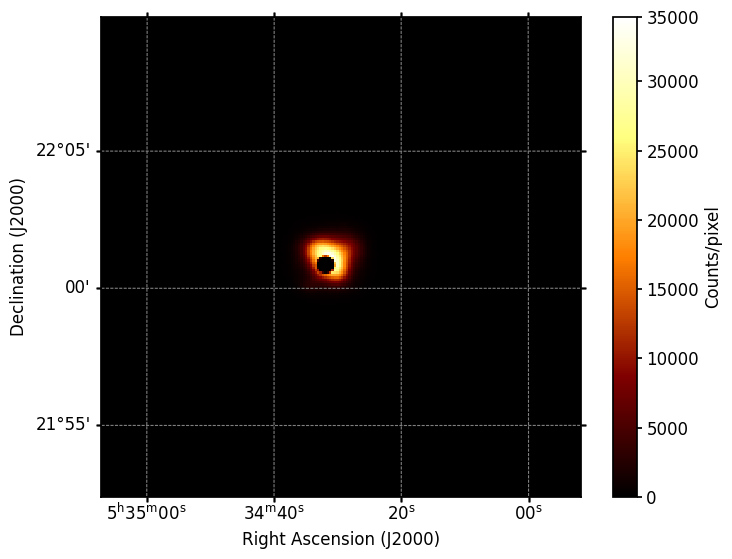

In [10]:
pwn_cmap_list = pipeline.xpbin(*pwn_list, algorithm='CMAP', overwrite=True)
pipeline.xpbinview(*pwn_cmap_list)

### Polarization cubes pre-alignment

Before the alignment of the Stokes parameters, compute the polarization cube and print its content

In [11]:
kwargs = dict(algorithm='PCUBE', ebinalg='LIST', ebinning=ENERGY_BINNING, overwrite=True)
pwn_pcubes_list = pipeline.xpbin(*pwn_list, **kwargs)
pcube_pwn = xBinnedPolarizationCube.from_file_list(pwn_pcubes_list)
print(pcube_pwn)

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_pwn.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2038689R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2038689R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du1_pwn_pcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_pwn.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   1997688R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   1997688R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du2_pwn_pcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2039217R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2039217R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du3_pwn_pcube.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_pwn_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_pwn_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_pwn_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   
xBinnedPolarizationCube content:
Quantity     2.00--8.00 keV   
-------- ---------------------
  E_MEAN    3.7477692779974716
  COUNTS             3843202.0
      MU    0.3264781001339471
      W2       29791.205078125
   N_EFF           1852734.625
  FRAC_W    0.4820809900182192
  MDP_99  0.009653763069051502
     ...                   ...
      PD  0.008145524188876152
  PD_ERR 0.0031823981300764196
      PA    27.145593063691443
  PA_ERR    11.192545535161583
 P_VALUE  0.037791492026083374
  CONFID    0.9622085079739167
  SIGNIF     1.776910393536415
Length = 25 rows


### Stokes alignment

Perform the alignment of the Stokes parameter using xpstokesalign with a tangential polarization model

In [12]:
pwn_align_list = pipeline.xpstokesalign(*pwn_list, mode='TAN', ra=ra_psr, dec=dec_psr, overwrite=True)

>>> Alignment mode: "TAN"
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_pwn.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2038689R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2038689R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Writing output f

Filename: /Users/karur/ixpeobssimdata/crab_du2_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   1997688R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   1997688R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du1_pwn.fits...
>>> Writing output file /Users/karur/ixpeobssimdata/crab_du2_pwn_stokesalign.fits
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_pwn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2039217R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2039217R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du2_pwn.fits...
>>> Writing output file /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign.fits
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_pwn.fits...


### Polarization cubes post-alignment

Bin again the files to produce polarization cubes after the alignment and plot the results

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_pwn_stokesalign.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_pwn_stokesalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2038689R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2038689R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTab

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du1_pwn_stokesalign_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du1_pwn_stokesalign_pcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_pwn_stokesalign.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_pwn_stokesalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   1997688R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   1997688R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du2_pwn_stokesalign_pcube.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    105   2039217R x 20C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2039217R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     38   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign_pcube.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_pwn_stokesalign_pcube.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_pwn_stokesalign_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_pwn_stokesalign_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> xBinnedPolarizationCube content:
Quantity    2.00--8.00 keV   
-------- --------------------
  E_MEAN   3.7477692779974716
  COUNTS            3843202.0
      MU   0.3264781001339471
      W2      29791.205078125
   N_EFF          1852734.625
  FRAC_W   0.4820809900182192
  MDP_99 0.009653763069051502
     ...                  ...
      PD  0.16259168088436127
  PD_ERR 0.003180161150072819
      PA  -0.5260355033041416
  PA_ERR   0.5607245702601348
 P_VALUE                  0.0
  CONFID                  1.0
  SIGNIF    51.12695901389427
Length = 25 rows


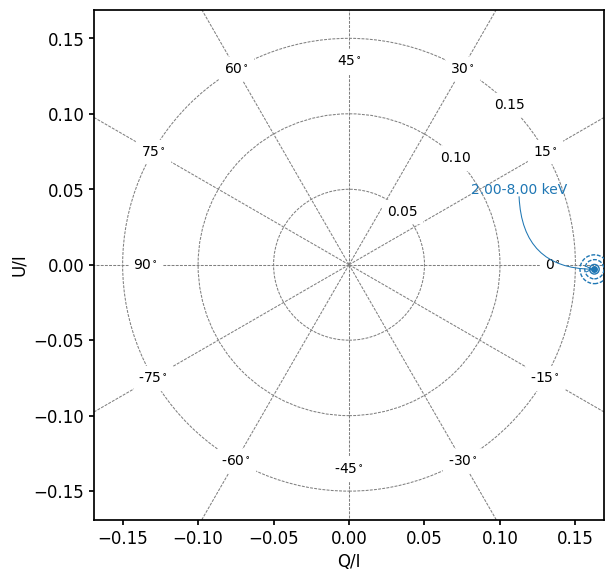

In [13]:
kwargs = dict(algorithm='PCUBE', ebinalg='LIST', ebinning=ENERGY_BINNING, overwrite=True)
pwn_align_pcubes_list = pipeline.xpbin(*pwn_align_list, **kwargs)
pipeline.xpbinview(*pwn_align_pcubes_list)

## Crab Pulsar analysis

In the Crab pulsar analysis we select the small central region and produce polarization cubes in a few bins of phase. In this way we can measure the polarization as a function of phase and compare the results with the input model

### Spatial selection

Run xpselect to select the events in the pulsar region

In [14]:
psr_list = pipeline.xpselect(*folded_list, ra=ra_psr, dec=dec_psr, rad=arcsec_to_arcmin(20), suffix='psr', overwrite=True)

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_folded.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2649179R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2649179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU 

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /Users/karur/ixpeobssimdata/crab_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   570199R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   570199R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_folded.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2567201R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2567201R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du2_folded_psr.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du1_folded.fits...
>>> Running event selection with kwargs {'filelist': ['/Users/karur/ixpeobssimdata/crab_du1_folded.fits', '/Users/karur/ixpeobssimdata/crab_du2_folded.fits', '/Users/karur/ixpeobssimdata/crab_du3_folded.fits'], 'suffix': 'psr', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': 83.63307624999999, 'dec': 22.014493277777778, 'rad': 0.33333333333

Filename: /Users/karur/ixpeobssimdata/crab_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   535471R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   535471R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_folded.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   ()      
  1  EVENTS        1 BinTableHDU    106   2602169R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   2602169R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     39   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du3_folded_psr.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du2_folded.fits...
>>> Running event selection with kwargs {'filelist': ['/Users/karur/ixpeobssimdata/crab_du1_folded.fits', '/Users/karur/ixpeobssimdata/crab_du2_folded.fits', '/Users/karur/ixpeobssimdata/crab_du3_folded.fits'], 'suffix': 'psr', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': None, 'phasemax': None, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': 83.63307624999999, 'dec': 22.014493277777778, 'rad': 0.33333333333

Filename: /Users/karur/ixpeobssimdata/crab_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   536333R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   536333R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_folded.fits...


### Pulse profile

Run xpbin with the PP algorithm to produce the pulse profile

>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /Users/karur/ixpeobssimdata/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   570199R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   570199R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHD

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du1_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du1_folded_psr_pp.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du2_folded_psr.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   535471R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   535471R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du2_folded_psr_pp.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du1_folded_psr.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du2_folded_psr_pp.fits...
>>> Done.
>>> Opening input event file /Users/karur/ixpeobssimdata/crab_du3_folded_psr.fits...


Filename: /Users/karur/ixpeobssimdata/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  EVENTS        1 BinTableHDU    107   536333R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   536333R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /Users/karur/ixpeobssimdata/crab_du3_folded_psr_pp.fits...
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du2_folded_psr.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  RATE          1 xBinTableHDUPP     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PP binned data to /Users/karur/ixpeobssimdata/crab_du3_folded_psr_pp.fits...
>>> Done.
>>> Closing event file /Users/karur/ixpeobssimdata/crab_du3_folded_psr.fits...
>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du1_folded_psr_pp.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du2_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /Users/karur/ixpeobssimdata/crab_du3_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> xBinnedPulseProfile content:
{'PHASE': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99]), 'PHASEDEL': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02]), 'COUNTS': array([25691, 26988, 28050, 31597, 40118, 56930, 89824, 85214, 45257,
       33725, 29165, 27304, 26626, 26414, 26410, 26842, 27062, 27764,
       28075, 28628, 30048, 31246, 33657, 37705, 43118, 50033, 58683,
       59969, 43920, 34454, 31138, 28736, 27137, 25

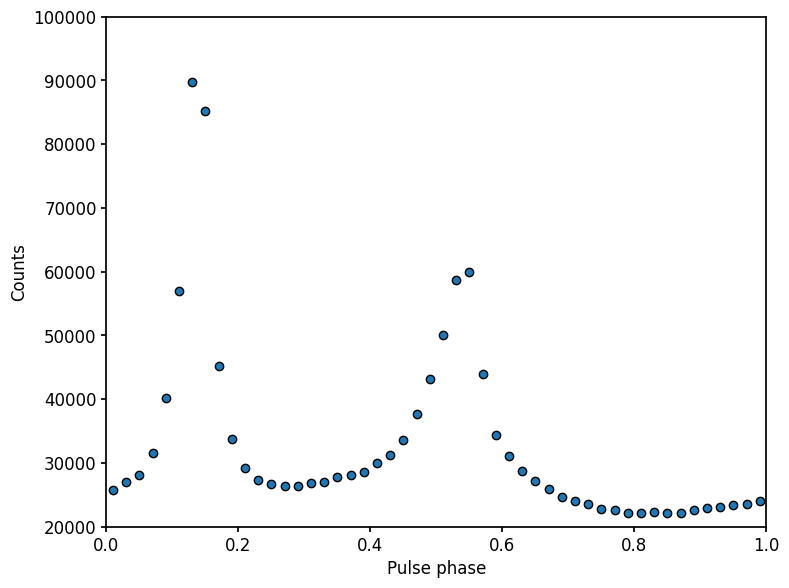

In [15]:
psr_pp_list = pipeline.xpbin(*psr_list, algorithm='PP', overwrite=True)
pipeline.xpbinview(*psr_pp_list)

### Phase selection and polarization cubes

Loop over the selected phase bins, run xpselect to cut the events and xpbin with PCUBE algorithm to calculate the polarization cubes

In [16]:
PHASE_BINNING_LO = numpy.array([0, 0.14, 0.25, 0.4, 0.55, 0.7])
PHASE_BINNING_HI = numpy.array([0.14, 0.25, 0.4, 0.55, 0.7, 1])
for min_, max_ in zip(PHASE_BINNING_LO, PHASE_BINNING_HI):
    suff_ = 'phase_%.3f_%.3f' % (min_, max_)
    sel_list = pipeline.xpselect(*psr_list, phasemin=min_, phasemax=max_, suffix=suff_, overwrite=True)
    pipeline.xpbin(*sel_list, algorithm='PCUBE', ebinalg='LIST', ebinning=ENERGY_BINNING, overwrite=True)

>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA   

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.000_0.140', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.0, 'phasemax': 0.14, 'phaseinvert': False, 'emin': None, 'emax': None, 'einvert': False, 'ra': None, 'dec': None, 'rad': None, 'i

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   104602R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   104602R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.000_0.140.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.000_0.140', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.0, 'phasemax': 0.14, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   97140R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   97140R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.000_0.140', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.0, 'phasemax': 0.14, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   97063R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   97063R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   104602R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   104602R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I] 

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.000_0.140.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.000_0.140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   97140R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   97140R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.000_0.140_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   97063R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   97063R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA   

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   81729R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   81729R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.140_0.250.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.140_0.250', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.14, 'phasemax': 0.25, 'phaseinvert

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   76192R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   76192R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.140_0.250', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.14, 'phasemax': 0.25, 'phaseinvert

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   75937R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   75937R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.140_0.250.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.140_0.250.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   81729R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   81729R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.140_0.250_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.140_0.250_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.140_0.250.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.140_0.250.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   76192R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   76192R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.140_0.250_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   75937R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   75937R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA   

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   70573R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   70573R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.250_0.400.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.250_0.400', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.25, 'phasemax': 0.4, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   66771R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   66771R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.250_0.400', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.25, 'phasemax': 0.4, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   67338R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   67338R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.250_0.400.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.250_0.400.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   70573R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   70573R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.250_0.400_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.250_0.400_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.250_0.400.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.250_0.400.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   66771R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   66771R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.250_0.400_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   67338R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   67338R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA   

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   110686R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   110686R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.400_0.550.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.400_0.550', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.4, 'phasemax': 0.55, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   102758R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   102758R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.400_0.550', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.4, 'phasemax': 0.55, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   102909R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   102909R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.400_0.550.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.400_0.550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   110686R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   110686R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I] 

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.400_0.550_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.400_0.550_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.400_0.550.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.400_0.550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   102758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   102758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.400_0.550_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   102909R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   102909R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA   

>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   85021R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   85021R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.550_0.700.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.550_0.700', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.55, 'phasemax': 0.7, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   79424R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   79424R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.550_0.700', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.55, 'phasemax': 0.7, 'phaseinvert'

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   80294R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   80294R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.550_0.700.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.550_0.700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   85021R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   85021R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.550_0.700_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.550_0.700_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.550_0.700.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.550_0.700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   79424R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   79424R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.550_0.700_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   80294R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   80294R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   569758R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   569758R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   117147R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   117147R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   534244R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   534244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.700_1.000', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.7, 'phasemax': 1.0, 'phaseinvert':

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   111959R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   111959R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    109   537933R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   537933R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000.fits...
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits...
>>> Running event selection with kwargs {'filelist': ['/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr.fits', '/home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits'], 'suffix': 'phase_0.700_1.000', 'tmin': None, 'tmax': None, 'tinvert': False, 'phasemin': 0.7, 'phasemax': 1.0, 'phaseinvert':

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   114392R x 21C   ['J', 'J', 'J', 'D', 'J', 'J', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     57   114392R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   ['I', '20A']   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr.fits...
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000.fits...



    Welcome to ixpeobssim 30.2.2 (built on Wed, 15 Feb 2023 10:22:34 +0100).

    Copyright (C) 2015--2023, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   117147R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   117147R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I] 

>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...
>>> Energy binning: [2. 8.]
>>> Using cached xModulationFactor object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/modfact/ixpe_d1_obssim_mfact_v012.fits...
>>> Using cached xEffectiveArea object at /home/ndilalla/work/ixpe/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_v012.arf...
>>> Performing un-weighted analysis...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   111959R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   111959R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...
>>> Done.
>>> Opening input event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000.fits...


Filename: /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    109   114392R x 21C   [J, J, J, D, J, J, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     57   114392R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     40   3R x 2C   [I, 20A]   
  5  TIMELINE      1 BinTableHDU     43   1R x 4C   [D, D, I, I]   
  6  SC_DATA       1 BinTableHDU     59   8002R x 9C   [D, E, E, E, E, E, E, I, I]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword DATE-END in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword EQUINOXa in binary table. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.623049418255  22.019103733896  
CRPIX : 300.5  300.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222222222222  0.000722222222222222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Re-building the ROI table...
>>> Setting outfile 

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     40   ()      
  1  POLARIZATION    1 xBinTableHDUPCUBE     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   [D, D]   


>>> Writing PCUBE binned data to /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...
>>> Done.
>>> Closing event file /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000.fits...


### Background subtraction

Now we consider the off-pulse part of the pulse profile (dominated by the nebular emission) as an estimate for the background of the pulsar analysis. After the rescaling for the different widths of the phase intervals, the background contribution is subtracted from the pulsar polarization cubes

In [17]:
pd = []
pd_err = []
pa = []
pa_err = []
mdp = []
bkg_pcubes_list = pipeline.file_list('folded', 'psr', 'phase_0.700_1.000', 'pcube')
bkg_delta_p = PHASE_BINNING_HI[-1] - PHASE_BINNING_LO[-1]
for min_, max_ in zip(PHASE_BINNING_LO[:-1], PHASE_BINNING_HI[:-1]):
    src_pcubes_list = pipeline.file_list('folded', 'psr', 'phase_%.3f_%.3f' % (min_, max_), 'pcube')
    pcube_src = xBinnedPolarizationCube.from_file_list(src_pcubes_list)
    pcube_bkg = xBinnedPolarizationCube.from_file_list(bkg_pcubes_list)
    beta = (max_ - min_) / bkg_delta_p
    pcube_bkg *= beta
    pcube_src -= pcube_bkg
    pd.append(pcube_src.PD[0])
    pd_err.append(pcube_src.PD_ERR[0])
    pa.append(pcube_src.PA[0])
    pa_err.append(pcube_src.PA_ERR[0])
    mdp.append(pcube_src.MDP_99)

>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.000_0.140_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.000_0.140_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.000_0.140_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.140_0.250_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.140_0.250_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.140_0.250_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.250_0.400_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.250_0.400_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.250_0.400_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.400_0.550_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.400_0.550_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.400_0.550_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.550_0.700_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.550_0.700_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.550_0.700_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_phase_0.700_1.000_pcube.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  POLARIZATION    1 BinTableHDU     88   1R x 27C   ['E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


### Polarization degree results

Plot the polarization degree results as a function of phase with superimposed the MDP values for the same phase bins and the input model

>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du1_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du2_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


>>> Reading (in memory) /home/ndilalla/work/ixpe/outdata/ixpeobssim/crab_du3_folded_psr_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   ()      
  1  RATE          1 BinTableHDU     41   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     40   1R x 2C   ['D', 'D']   


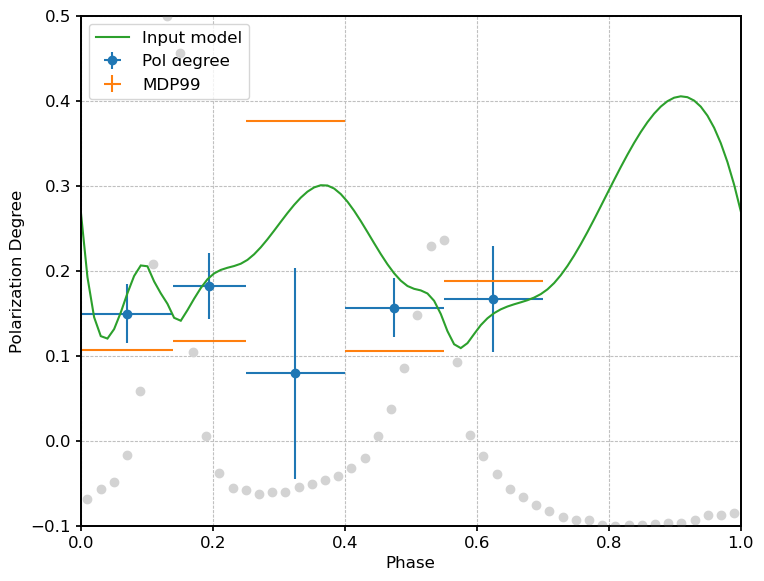

In [26]:
phase = 0.5*(PHASE_BINNING_LO[:-1] + PHASE_BINNING_HI[:-1])
phase_err = 0.5*(PHASE_BINNING_HI[:-1] - PHASE_BINNING_LO[:-1])
light_curve = xBinnedPulseProfile.from_file_list(psr_pp_list)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(light_curve.PHASE, light_curve.COUNTS, 'o', color='lightgrey')
ax1.errorbar(phase, pd, yerr=pd_err, xerr=phase_err, fmt='o', label='Pol degree')
ax1.errorbar(phase, mdp, yerr=numpy.zeros(len(mdp)), xerr=phase_err, fmt='none', label='MDP99')
x_ = numpy.linspace(0, 1, 100)
ax1.plot(x_, pol_deg_spline(x_), label='Input model')
ax1.legend()

ax1.set_xlabel('Phase')
ax1.set_ylabel('Polarization Degree')
ax1.set_xlim(0, 1)
ax2.set_yticks([])
ax1.grid()


### Polarization angle results

Plot the polarization angle results as a function of phase with superimposed the input model

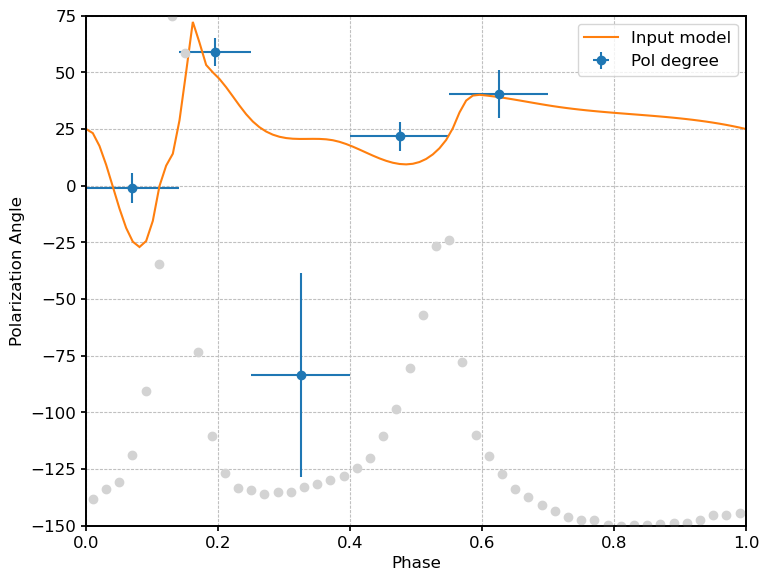

In [19]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(light_curve.PHASE, light_curve.COUNTS, 'o', color='lightgrey')
ax1.errorbar(phase, pa, yerr=pa_err, xerr=phase_err, fmt='o', label='Pol degree')
ax1.plot(x_, numpy.rad2deg(pol_ang_spline(x_)), label='Input model')
ax1.legend()

ax1.set_xlabel('Phase')
ax1.set_ylabel('Polarization Angle')
ax1.set_xlim(0, 1)
ax2.set_yticks([])
ax1.grid()